In [18]:
import numpy as np
import sympy
from matplotlib import pyplot as plt

# Detecting Crossings using eigenvector comparison
requires many evaluations, but might work if we simplify the model before evaluating (using the Andrea Method).
This notebook studies how well the crossing detection works if we have done the projection


## Model Hamiltonian

In [552]:
el,er,t = sympy.symbols('e_{L},e_{R},t')
H = sympy.Matrix([[el,t],[sympy.conjugate(t),er]])
H

Matrix([
[       e_{L},     t],
[conjugate(t), e_{R}]])

In [51]:
evals=list(H.eigenvals().keys())
evects=list(l[-1][0] for l in H.eigenvects())

In [251]:
def eigenvalue_compuer(H,el_range,er_range,params):
    hh = H.subs(params)
    hl = sympy.lambdify((el,er),hh)
    EL,ER =np.meshgrid(el_range,er_range)

    hstack = np.stack([hl(El,Er) for El,Er in zip(EL.ravel(),ER.ravel())]).reshape(*EL.shape,*H.shape).astype('complex')
    return np.linalg.eigh(hstack)

In [90]:
def heat_map(el_range,er_range,eval_i,tval):
    l = sympy.lambdify((el,er),evals[eval_i].subs(t,tval))
    EL,ER =np.meshgrid(el_range,er_range)
    vals= l(EL,ER)
    return vals



def evec_heat_map(el_range,er_range,evec_i,tval):
    evec =  evects[evec_i].subs(t,tval)
    evec_0 =evec[0]
    evec_1 =evec[1]
    
    print(evec_0,evec_1)
    l0 = sympy.lambdify((el,er),evec_0)
    l1 = sympy.lambdify((el,er),evec_1)
    EL,ER =np.meshgrid(el_range,er_range)
    c0=l0(EL,ER)
    c1=l1(EL,ER)
    if not isinstance(c0,np.ndarray):
        c0 = np.full_like(EL,c0)
    if not isinstance(c1,np.ndarray):
        c1 = np.full_like(EL,c1)
    
    vals= np.stack([c0,c1])
    
    return vals


In [554]:
el_range = np.linspace(-4,4,164)
er_range = np.linspace(-4,4,164)

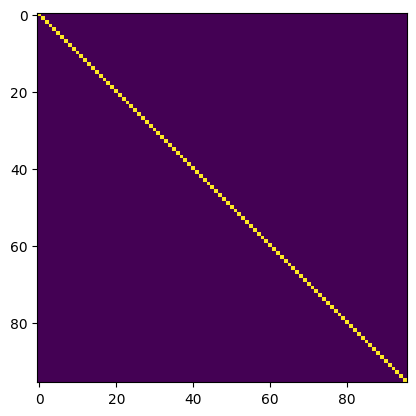

In [555]:
V=evec_heat_map(el_range,er_range,1,0.5)
equal = np.where(np.isclose(V[0],V[1]))
special =np.zeros_like(V[0])
special[equal] = 1
plt.imshow(special)

Extend the Hamiltonian to include another mode that messes things up

In [589]:
E,DL,DR = sympy.symbols('\epsilon,\delta_{L},\delta_{R}')

H = sympy.Matrix([[el,t,DL,0.05],[sympy.conjugate(t),er,DR,0.05],[sympy.conjugate(DL),sympy.conjugate(DR),E,0],[0.05,0.05,0,-2]])
H

Matrix([
[                e_{L},                     t, \delta_{L}, 0.05],
[         conjugate(t),                 e_{R}, \delta_{R}, 0.05],
[conjugate(\delta_{L}), conjugate(\delta_{R}),   \epsilon,    0],
[                 0.05,                  0.05,          0,   -2]])

In [590]:
Hvals = eigenvalue_compuer(H,el_range,er_range,{DL:0.1,DR:0.1,E:0,t:0.3})


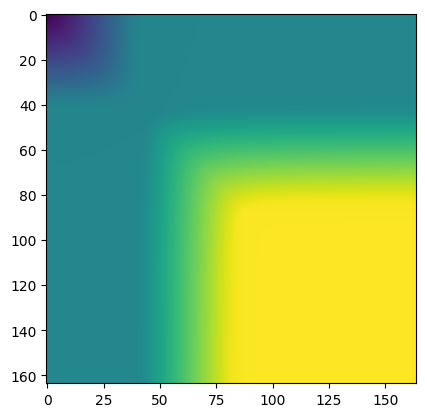

In [591]:
plt.imshow(Hvals[0][...,1])

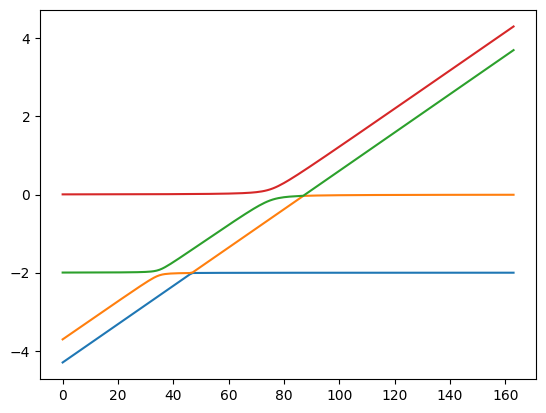

In [592]:
plt.plot(np.diagonal(Hvals[0],0,0,1).T)

In [593]:
P=np.linalg.norm(Hvals[1][...,[0,1],:],axis=2)**2 *0.5
pp = np.sort(P,axis=-1)
pI = np.argsort(P,axis=-1)

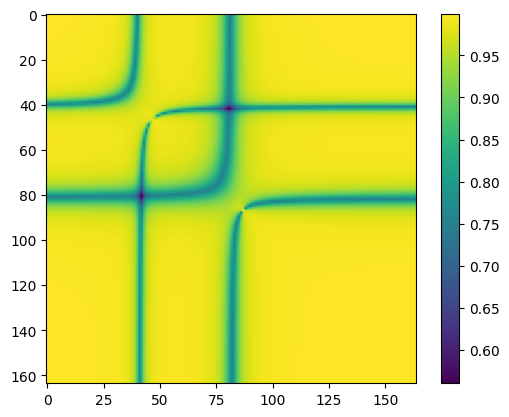

In [594]:
plt.imshow(np.sum(pp[:,:,2:],axis=-1))
plt.colorbar()

In [595]:
pe = np.take_along_axis(Hvals[0],pI,-1)

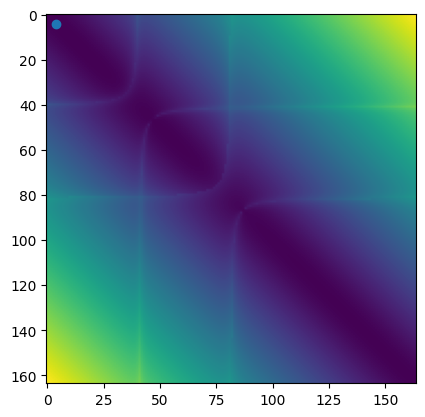

In [598]:
edif= np.abs(pe[...,3]-pe[...,2])-np.sum(pp[:,:,2:],axis=-1)**2
plt.imshow(edif)
mini=np.unravel_index(np.argmin(edif),edif.shape)
plt.scatter(*mini)

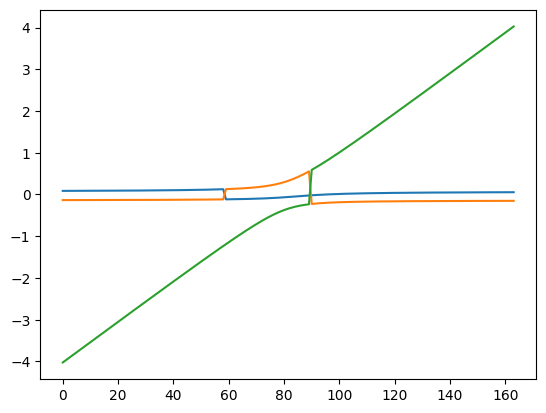

In [567]:
plt.plot(pe[:,80])

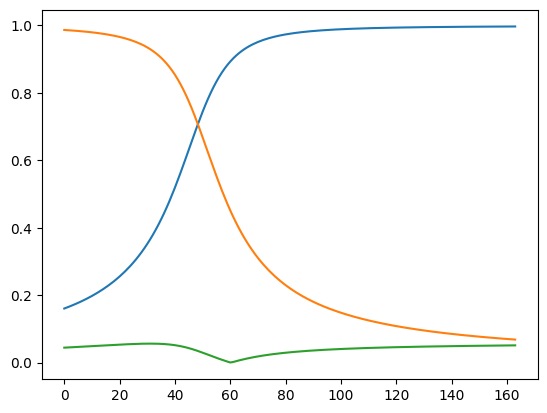

In [428]:
plt.plot(np.abs(Hvals[1][:,48,:,0]))

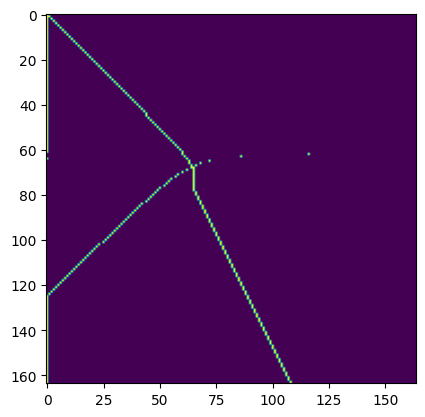

In [304]:
equal =np.argmin(np.abs(np.abs(Hvals[1][:,:,0,0])-np.abs(Hvals[1][:,:,2,0])),axis=0)
equal2 =np.argmin(np.abs(np.abs(Hvals[1][:,:,0,0])-np.abs(Hvals[1][:,:,1,0])),axis=1)
special =np.zeros_like(Hvals[0][...,0])
_i=np.arange(Hvals[1].shape[0])
special[_i,equal] = 1
special[_i,equal2] = 1

plt.imshow(special)


In [298]:
equal

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  67,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127,
       129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153,
       155, 157, 159, 161, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 163, 163])

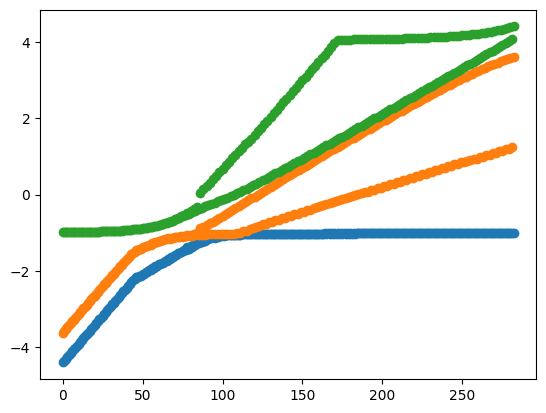

In [303]:
plt.plot(Hvals[0][special.astype('bool')],ls='',marker='o')

# Model Hamiltonian
$$\begin{pmatrix}
\varepsilon + B & 0 & 0 & 0 & t & t & \Delta & \Delta \\
0 & \varepsilon - B & 0 & 0 & t & t & \Delta & \Delta \\
0 & 0 & -\varepsilon + B & 0 & -\Delta & -\Delta & -t & -t \\
0 & 0 & 0& -\varepsilon - B & -\Delta & -\Delta & -t & -t \\
t & t & -\Delta & -\Delta & \varepsilon + B &  0& 0 & 0 \\
t & t & -\Delta & -\Delta &0& \varepsilon - B &  0& 0   \\
\Delta & \Delta & -t & -t &0& 0&   -\varepsilon + B& 0   \\
\Delta & \Delta & -t & -t &0& 0& 0  & \varepsilon  -B  \\
\end{pmatrix}$$

In [20]:
SYMS =  sp.symbols('t,t_{so},\\Delta,\\Delta_{so},\\varepsilon_{L},\\varepsilon_{R},B')
t,tso,D,Dso,EL,ER,B = SYMS

In [21]:
c = lambda x: sp.conjugate(x)
H = sp.Matrix([[EL+B,0,0,0,t,tso,D,Dso],
               [0,EL-B,0,0,tso,t,Dso,D],
               [0,0,-EL+B,0,-D,-Dso,-t,-tso],
               [0,0,0,-EL-B,-Dso,-D,-tso,-t],
               [c(t),c(tso),c(-D),c(-Dso),ER+B,0,0,0],
               [c(tso),c(t),c(-Dso),c(-D),0,ER-B,0,0],
               [c(D),c(Dso),c(-t),c(-tso),0,0,-ER+B,0],
               [c(Dso),c(D),c(-tso),c(-t),0,0,0,-ER-B],])
#H = sp.Matrix([[E+B,0,0,0,t,t,D,D],[0,E-B,0,0,t,t,D,D],[0,0,-E+B,0,-D,-D,-t,-t],[0,0,0,-E-B,-D,-D,-t,-t],[t,t,-D,-D,E+B,0,0,0],[t,t,-D,-D,0,E-B,0,0],[D,D,-t,-t,0,0,-E+B,0],[D,D,-t,-t,0,0,0,-E-B]])


In [19]:
H

Matrix([
[   B + \varepsilon_{L},                      0,                       0,                       0,                   t,               t_{so},              \Delta,          \Delta_{so}],
[                     0,   -B + \varepsilon_{L},                       0,                       0,              t_{so},                    t,         \Delta_{so},               \Delta],
[                     0,                      0,     B - \varepsilon_{L},                       0,             -\Delta,         -\Delta_{so},                  -t,              -t_{so}],
[                     0,                      0,                       0,    -B - \varepsilon_{L},        -\Delta_{so},              -\Delta,             -t_{so},                   -t],
[          conjugate(t),      conjugate(t_{so}),      -conjugate(\Delta), -conjugate(\Delta_{so}), B + \varepsilon_{R},                    0,                   0,                    0],
[     conjugate(t_{so}),           conjugate(t), -conjugate(\

In [22]:
lambda_mat = sp.lambdify(SYMS,H)
def eigenvalue_maker(*args):
    A = np.array(lambda_mat(*args))
    return np.linalg.eigh(A)

In [ ]:
EE = list(EVALS.keys())
EE[0].free_symbols

{B, \Delta, \Delta_{so}, \varepsilon, t, t_{so}}

In [23]:
SYMS

(t, t_{so}, \Delta, \Delta_{so}, \varepsilon_{L}, \varepsilon_{R}, B)

In [69]:
E_range = np.linspace(-3,3,64)
Bval = 1
MotherD = 10
Hstack = np.stack([np.array(lambda_mat(*(0,0,0,0,MotherD*3/7,e-0,MotherD*1/7))) for e in E_range])


In [70]:
evals = np.linalg.eigh(Hstack)[0]

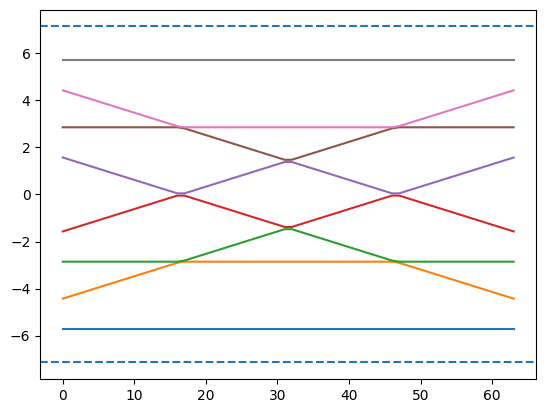

In [71]:
from matplotlib import pyplot as plt
plt.plot(evals)
#plt.ylim(7,13)
plt.axhline(MotherD*5/7,ls='--')
plt.axhline(-MotherD*5/7,ls='--')